## Module 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = [
    'Date', 'Time', 'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
    'Sub_metering_3'
]

data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    na_values='?',
    names=column_names,
    header=None,
    skiprows=1,
    encoding='latin1',
    engine='python'
)
print(data.head())
print(data.shape)



         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
(162495, 9)


In [ ]:
print(data.info())
print(data.describe(include="all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635818 entries, 0 to 635817
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   635818 non-null  object 
 1   Time                   635818 non-null  object 
 2   Global_active_power    631879 non-null  float64
 3   Global_reactive_power  631879 non-null  float64
 4   Voltage                631879 non-null  float64
 5   Global_intensity       631879 non-null  float64
 6   Sub_metering_1         631879 non-null  float64
 7   Sub_metering_2         631879 non-null  float64
 8   Sub_metering_3         631878 non-null  float64
dtypes: float64(7), object(2)
memory usage: 43.7+ MB
None
            Date      Time  Global_active_power  Global_reactive_power  \
count     635818    635818        631879.000000          631879.000000   
unique       443      1440                  NaN                    NaN   
top     1/3/2008  06:21:00 

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
0              18.4             0.0             1.0            17.0   
1              23.0             0.0             1.0            16.0   
2              23.0             0.0             2.0            17.0   
3              23.0             0.0             1.0            17.0   
4              15.8             0.0             1.0            17.0   

             Datetime  
0 2006-12-16 17:24:00  
1 2006-12-16 17:25:00  
2 2006-12-16 17:26:0

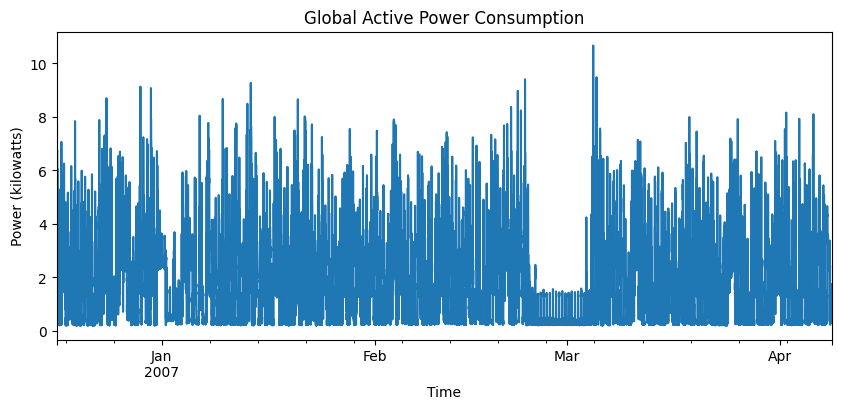

In [ ]:
data[['Date', 'Time']].isnull().sum()
data['Datetime'] = pd.to_datetime(
    data['Date'] + ' ' + data['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

print(data.head())
data.set_index('Datetime', inplace=True)
data['Global_active_power'].plot(figsize=(10,4))
plt.title("Global Active Power Consumption")
plt.xlabel("Time")
plt.ylabel("Power (kilowatts)")
plt.show()

##Module 2

In [ ]:
print(data.isnull().sum())
print(data.ffill(inplace=True))




Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64
None


In [ ]:
Q1 = data['Global_active_power'].quantile(0.25)
Q3 = data['Global_active_power'].quantile(0.75)
IQR = Q3 - Q1

data = data[
    (data['Global_active_power'] >= Q1 - 1.5 * IQR) &
    (data['Global_active_power'] <= Q3 + 1.5 * IQR)
]

# Drop non-numeric columns 'Date' and 'Time' before resampling
data_numeric = data.drop(columns=['Date', 'Time'])
print(data_numeric)
hourly_data = data_numeric.resample('h').mean() # Updated: Using 'h' instead of 'H'
print(hourly_data)
daily_data = data_numeric.resample('D').mean()
print(daily_data)

                     Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-16 17:53:00                3.178                  0.000   235.28   
2006-12-16 17:54:00                2.720                  0.000   235.06   
2006-12-16 17:59:00                2.472                  0.058   236.94   
2006-12-16 18:00:00                2.790                  0.180   237.52   
2006-12-16 18:01:00                2.624                  0.144   238.20   
...                                  ...                    ...      ...   
2008-03-02 06:17:00                0.296                  0.096   242.50   
2008-03-02 06:18:00                0.296                  0.096   242.75   
2008-03-02 06:19:00                0.296                  0.096   243.09   
2008-03-02 06:20:00                0.368                  0.174   243.36   
2008-03-02 06:21:00                0.372                  0.204   243.10   

           

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
hourly_data[['Voltage']] = scaler.fit_transform(
    hourly_data[['Voltage']]
)

print(hourly_data.head())

                     Global_active_power  Global_reactive_power   Voltage  \
Datetime                                                                    
2006-12-16 17:00:00             2.790000               0.019333  0.404990   
2006-12-16 18:00:00             2.664533               0.070000  0.395742   
2006-12-16 19:00:00                  NaN                    NaN       NaN   
2006-12-16 20:00:00             2.690800               0.102000  0.342317   
2006-12-16 21:00:00             2.278667               0.078667  0.490087   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-16 17:00:00         11.800000             0.0        0.000000   
2006-12-16 18:00:00         11.360000             0.0        1.433333   
2006-12-16 19:00:00               NaN             NaN             NaN   
2006-12-16 20:00:00         11.720000             0.0        0.000000   
2006-12-16 21:00:00   

In [ ]:
train_size = int(len(hourly_data) * 0.7)
val_size = int(len(hourly_data) * 0.15)

train = hourly_data[:train_size]
val = hourly_data[train_size:train_size + val_size]
test = hourly_data[train_size + val_size:]

print("Train size:", train.shape)
print("Validation size:", val.shape)
print("Test size:", test.shape)


Train size: (7418, 7)
Validation size: (1589, 7)
Test size: (1591, 7)
